In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

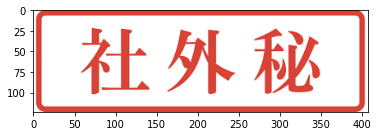

In [2]:
img1 = cv2.imread('mark.png')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

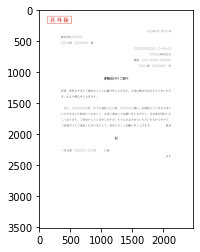

In [3]:
img2 = cv2.imread('./document.png')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

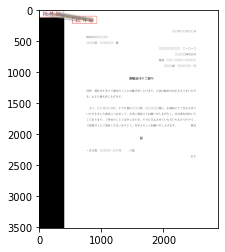

In [4]:
akaze = cv2.AKAZE_create()                                

kp1, des1 = akaze.detectAndCompute(img1, None)
kp2, des2 = akaze.detectAndCompute(img2, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

ratio = 0.5
good = []
for m, n in matches:
    if m.distance < ratio * n.distance:
        good.append([m])

img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=2)

plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.show()